In [110]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

# genSavePath = f"{os.getcwd()}/topFeaturesResults/"

# paradigms = ["ud", "rl", "udrl"]
# types = ["I","V"]
# comboNr = [1,2,3,4]
# results = []
# for para in paradigms:
#     for type in types:
#         for nr in comboNr:
#             path = glob.glob(genSavePath + f"top{nr}{para}{type}*")
#             if len(path) > 0:
#                 topFeatures = path
#         if len(topFeatures)>0:
#             results.append(np.load(topFeatures[0], allow_pickle=True))
# # print(len(results))
# results = np.array(results,dtype=object)
# # print(results.shape) # Paradigm, subject, top2, [acc, sub, name, kern, C]
# # print(results[0])
# # print(results[0,0])
# # print(results[1])
# results = results[:,:,0,:]
# # print(results[0,1,1])
# # print(results[0,1])
# bestPerSub = np.zeros([results.shape[0], results.shape[1]])
# for ind, para in enumerate(results):
#     for subj in para:
#         # print(subj[0])
#         # print(int(subj[1]))
#         bestPerSub[ind, int(subj[1])-1] = subj[0]
# bestPerSub = np.array(bestPerSub)
# plt.figure(figsize=[15,10])
# plt.boxplot(bestPerSub.T)
# combos = []
# for para in paradigms:
#     for type in types:
#         combos.append(f"{para}{type}")
# #plt.legend(combos)
# plt.xticks(np.arange(len(combos))+1, combos,rotation=20)
# plt.title("Best Per subject for each paradigm")
# print("")

In [111]:
import matplotlib as mpl
mpl.rcParams["figure.dpi"]  = 80

In [112]:
#results = np.array(results,dtype=object)
# print(results.shape) # Paradigm, subject, top2, [acc, sub, name, kern, C]
# print(results[0])
# print(results[0,0])
# print(results[1])
# results = results[:,:,0,:]
# # print(results[0,1,1])
# # print(results[0,1])
# bestPerSub = np.zeros([results.shape[0], results.shape[1]])
# for ind, para in enumerate(results):
#     for subj in para:
#         # print(subj[0])
#         # print(int(subj[1]))
#         bestPerSub[ind, int(subj[1])-1] = subj[0]
# bestPerSub = np.array(bestPerSub)
# combos = []
# for para in paradigms:
#     for type in types:
#         combos.append(f"{para}{type}")

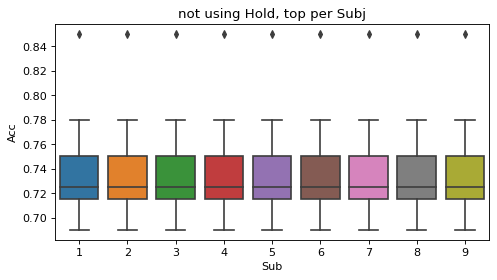

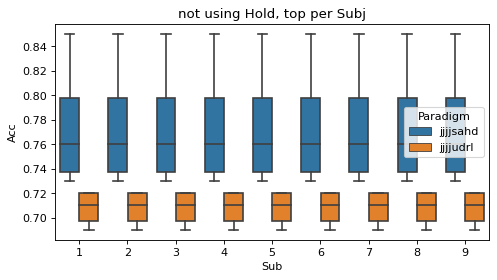

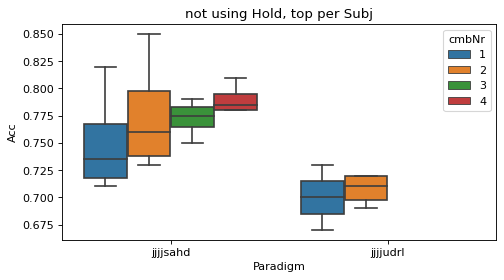

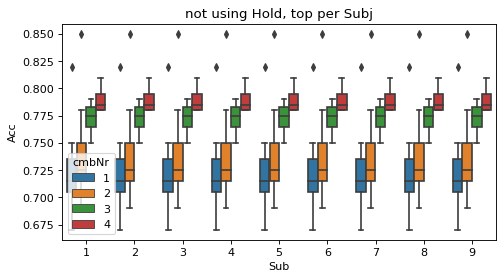

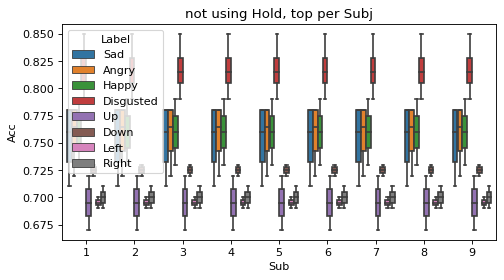

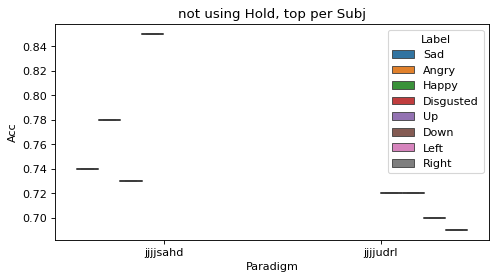

,Unnamed: 0,Acc,Sub,Feat,Kernel,C,Label,Paradigm,cmbNr
0,0,0.71,1,stftDatamyOwnTestSadAngryHappyDisgustedSecondm...,linear,2.5,Sad,jjjjsahd,1
1,1,0.71,2,stftDatamyOwnTestSadAngryHappyDisgustedSecondm...,linear,2.5,Sad,jjjjsahd,1
2,2,0.71,3,stftDatamyOwnTestSadAngryHappyDisgustedSecondm...,linear,2.5,Sad,jjjjsahd,1
3,3,0.71,4,stftDatamyOwnTestSadAngryHappyDisgustedSecondm...,linear,2.5,Sad,jjjjsahd,1
4,4,0.71,5,stftDatamyOwnTestSadAngryHappyDisgustedSecondm...,linear,2.5,Sad,jjjjsahd,1
...,...,...,...,...,...,...,...,...,...
31,31,0.69,5,gausDataSecond_&_stftData_CVFirst,linear,2.5,Right,jjjjudrl,2
32,32,0.69,6,gausDataSecond_&_stftData_CVFirst,linear,2.5,Right,jjjjudrl,2
33,33,0.69,7,gausDataSecond_&_stftData_CVFirst,linear,2.5,Right,jjjjudrl,2
34,34,0.69,8,gausDataSecond_&_stftData_CVFirst,linear,2.5,Right,jjjjudrl,2


In [113]:
# Not Using Hold Top Per Subj
# genSavePath = f"{os.getcwd()}/topFeaturesResultsHold/"
genSavePath = f"{os.getcwd()}/topFeaturesResults/"
import paradigmSetting as pa # [
paradigms = [pa.sadAngryHappyDisgustedJulia()[0], pa.UpDownLeftRightJulia()[0] ] # pa.rightLeftInner()[0]  pa.sadAngryHappyDisgustedJulia()[0], pa.upDownInner()[0], pa.upDownVis()[0], pa.rightLeftVis()[0], pa.rightLeftInner()[0], pa.upDownRightLeftVis()[0], pa.upDownRightLeftInner()[0]
comboNr = [1,2,3,4,5,6]
first = True
for para in paradigms:
    
    for nr in comboNr:
        topFeatures = []
        path = glob.glob(genSavePath + f"topPerSubj-para-{para}-cmb-{nr}*")
        if len(path) > 0:
            topFeatures = path
        if len(topFeatures)>0:
            #results.append(np.load(topFeatures[0], allow_pickle=True))
            if first:
                results = (pd.read_csv(topFeatures[0]).squeeze())
                results["cmbNr"] = nr
                first = False
                # print(f"{para}{nr}")

            else:
                # print(topFeatures)
                # print(f"{para}{nr}")
                newResults = pd.read_csv(topFeatures[0]).squeeze()
                newResults["cmbNr"] = nr
                results = pd.concat([results, newResults])
                

            # print(pd.read_csv(topFeatures[0]).shape)
        
# print(len(results))
results = pd.DataFrame(results)
# avgAccs = []
# for sub in (np.arange(9)+1):
#     print(sub)
# results["avgAcc"] = results["Acc"][results["Sub"] == 1]

#print(results)
comboNrFrames = []
highestCombo = 2
for nr in comboNr:
    comboNrFrames.append(results[results["cmbNr"] == nr])
pd.to_numeric(results["Acc"])
plt.figure(figsize=[7,3.5])
plt.title("not using Hold, top per Subj")
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub")
plt.show()

plt.figure(figsize=[7,3.5])
plt.title("not using Hold, top per Subj")
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", hue="Paradigm")
plt.show()

# plt.figure()
# sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Label")
# plt.show()
plt.figure(figsize=[7,3.5])
plt.title("not using Hold, top per Subj")
sns.boxplot(data = results, y="Acc", x = "Paradigm", hue = "cmbNr")
plt.show()

plt.figure(figsize=[7,3.5])
plt.title("not using Hold, top per Subj")
sns.boxplot(data = results, y="Acc", x = "Sub", hue = "cmbNr")
plt.show()

plt.figure(figsize=[7,3.5])
plt.title("not using Hold, top per Subj")
sns.boxplot(data = results, y="Acc", x = "Sub", hue = "Label")
plt.show()

plt.figure(figsize=[7,3.5])
plt.title("not using Hold, top per Subj")
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Paradigm", hue= "Label")
plt.show()
# plt.figure()
# sns.relplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", col="Label")
# plt.show()
# results[results["Paradigm"] == "vvvvudrl"]
results



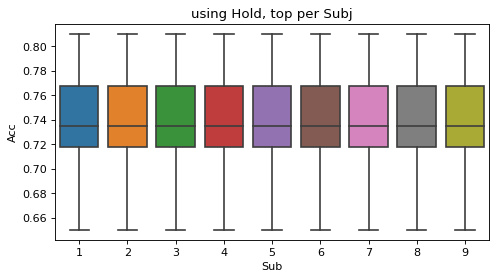

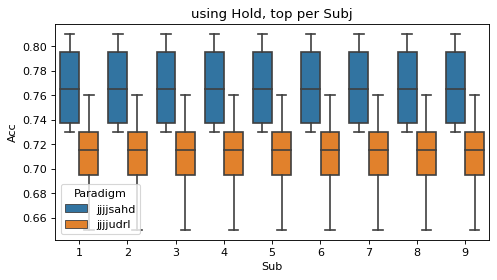

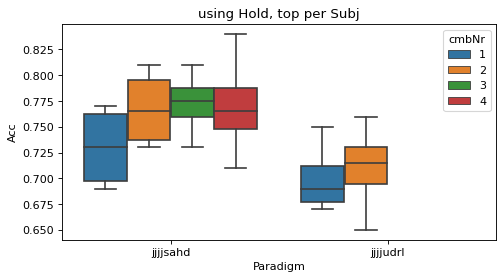

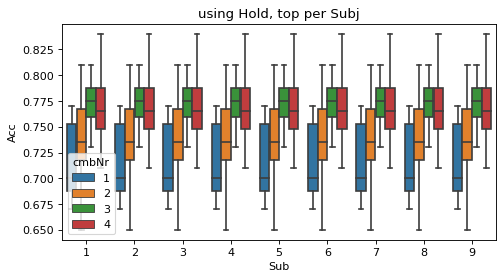

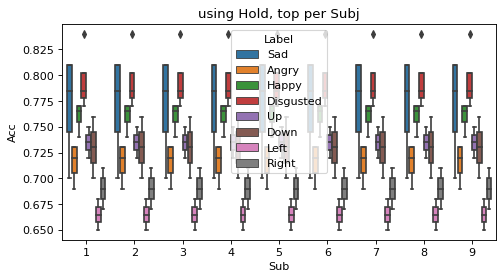

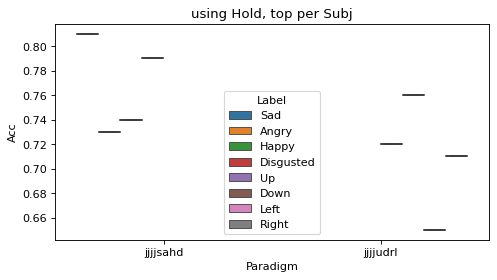

In [114]:
# Using Hold Top Per Subj
genSavePath = f"{os.getcwd()}/topFeaturesResultsHold/"
#genSavePath = f"{os.getcwd()}/topBestFeaturesResults/"
import paradigmSetting as pa # [
paradigms = [pa.sadAngryHappyDisgustedJulia()[0], pa.UpDownLeftRightJulia()[0]] #  ,  pa.rightLeftInner()[0] pa.upDownInner()[0], pa.upDownVis()[0], pa.rightLeftVis()[0],, pa.upDownRightLeftVis()[0], pa.upDownRightLeftInner()[0]
comboNr = [1,2,3,4,5,6]
first = True
for para in paradigms:
    
    for nr in comboNr:
        topFeatures = []
        path = glob.glob(genSavePath + f"topPerSubj-para-{para}-cmb-{nr}*")
        if len(path) > 0:
            topFeatures = path
        if len(topFeatures)>0:
            #results.append(np.load(topFeatures[0], allow_pickle=True))
            if first:
                results = (pd.read_csv(topFeatures[0]).squeeze())
                results["cmbNr"] = nr
                first = False
                # print(f"{para}{nr}")

            else:
                # print(topFeatures)
                # print(f"{para}{nr}")
                newResults = pd.read_csv(topFeatures[0]).squeeze()
                newResults["cmbNr"] = nr
                results = pd.concat([results, newResults])
                

            # print(pd.read_csv(topFeatures[0]).shape)
        
# print(len(results))
results = pd.DataFrame(results)
# avgAccs = []
# for sub in (np.arange(9)+1):
#     print(sub)
# results["avgAcc"] = results["Acc"][results["Sub"] == 1]

#print(results)
comboNrFrames = []
highestCombo = 2
for nr in comboNr:
    comboNrFrames.append(results[results["cmbNr"] == nr])
pd.to_numeric(results["Acc"])

plt.figure(figsize=[7,3.5])
plt.title("using Hold, top per Subj")
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub")
plt.show()

plt.figure(figsize=[7,3.5])
plt.title("using Hold, top per Subj")
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", hue="Paradigm")
plt.show()

# plt.figure()
# sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Label")
# plt.show()
plt.figure(figsize=[7,3.5])
plt.title("using Hold, top per Subj")
sns.boxplot(data = results, y="Acc", x = "Paradigm", hue = "cmbNr")
plt.show()

plt.figure(figsize=[7,3.5])
plt.title("using Hold, top per Subj")
sns.boxplot(data = results, y="Acc", x = "Sub", hue = "cmbNr")
plt.show()

plt.figure(figsize=[7,3.5])
plt.title("using Hold, top per Subj")
sns.boxplot(data = results, y="Acc", x = "Sub", hue = "Label")
plt.show()

plt.figure(figsize=[7,3.5])
plt.title("using Hold, top per Subj")
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Paradigm", hue= "Label")
plt.show()
# plt.figure()
# sns.relplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", col="Label")
# plt.show()
# results[results["Paradigm"] == "vvvvudrl"]
# results



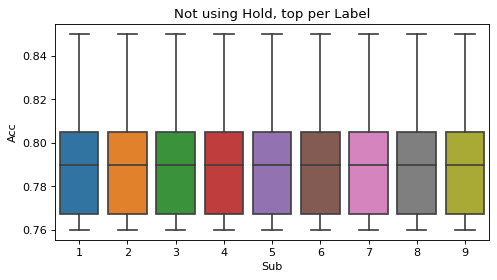

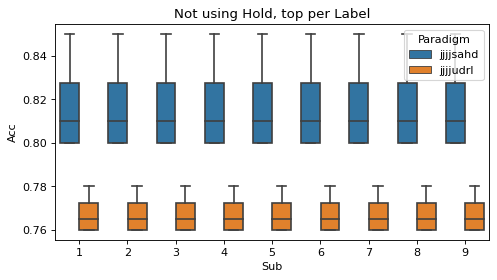

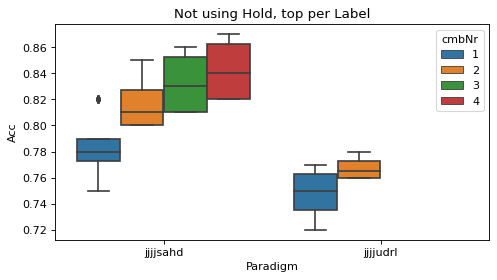

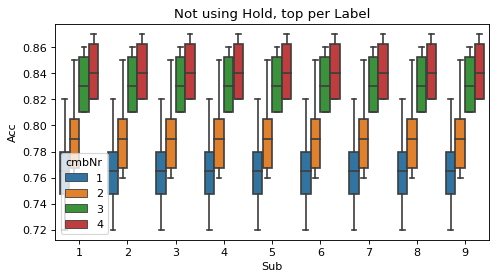

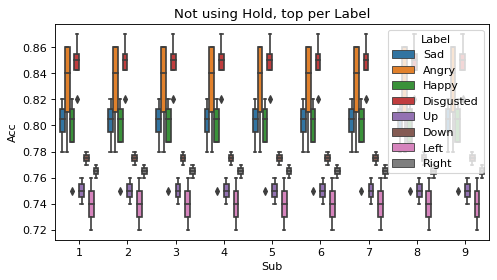

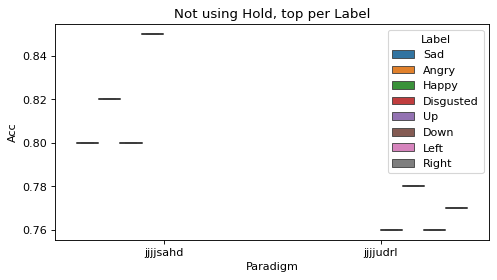

In [115]:
# Not Using Hold, top per label
genSavePath = f"{os.getcwd()}/topFeaturesResults/"
#genSavePath = f"{os.getcwd()}/topBestFeaturesResults/"
import paradigmSetting as pa # [
paradigms = [pa.sadAngryHappyDisgustedJulia()[0] , pa.UpDownLeftRightJulia()[0]] # pa.rightLeftInner()[0]pa.sadAngryHappyDisgustedJulia()[0] pa.upDownInner()[0], pa.upDownVis()[0], pa.rightLeftVis()[0], , pa.upDownRightLeftVis()[0], pa.upDownRightLeftInner()[0]
comboNr = [1,2,3,4,5,6]
first = True
for para in paradigms:
    
    for nr in comboNr:
        topFeatures = []
        path = glob.glob(genSavePath + f"topPerLabel-para-{para}-cmb-{nr}*")
        if len(path) > 0:
            topFeatures = path
        if len(topFeatures)>0:
            #results.append(np.load(topFeatures[0], allow_pickle=True))
            if first:
                results = (pd.read_csv(topFeatures[0]).squeeze())
                results["cmbNr"] = nr
                first = False
                # print(f"{para}{nr}")

            else:
                # print(topFeatures)
                # print(f"{para}{nr}")
                newResults = pd.read_csv(topFeatures[0]).squeeze()
                newResults["cmbNr"] = nr
                results = pd.concat([results, newResults])
                

            # print(pd.read_csv(topFeatures[0]).shape)
        
# print(len(results))
results = pd.DataFrame(results)
# avgAccs = []
# for sub in (np.arange(9)+1):
#     print(sub)
# results["avgAcc"] = results["Acc"][results["Sub"] == 1]

#print(results)
comboNrFrames = []
highestCombo = 2
for nr in comboNr:
    comboNrFrames.append(results[results["cmbNr"] == nr])
pd.to_numeric(results["Acc"])

plt.figure(figsize=[7,3.5])
plt.title("Not using Hold, top per Label")
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub")
plt.show()

plt.figure(figsize=[7,3.5])
plt.title("Not using Hold, top per Label")
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", hue="Paradigm")
plt.show()

# plt.figure()
# sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Label")
# plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Not using Hold, top per Label")
sns.boxplot(data = results, y="Acc", x = "Paradigm", hue = "cmbNr")
plt.show()

plt.figure(figsize=[7,3.5])
plt.title("Not using Hold, top per Label")
sns.boxplot(data = results, y="Acc", x = "Sub", hue = "cmbNr")
plt.show()

plt.figure(figsize=[7,3.5])
plt.title("Not using Hold, top per Label")
sns.boxplot(data = results, y="Acc", x = "Sub", hue = "Label")
plt.show()

plt.figure(figsize=[7,3.5])
plt.title("Not using Hold, top per Label")
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Paradigm", hue= "Label")
plt.show()

# plt.figure(figsize=[7,3.5])
# sns.relplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", col="Label")
# plt.show()
# results[results["Paradigm"] == "vvvvudrl"]
# results

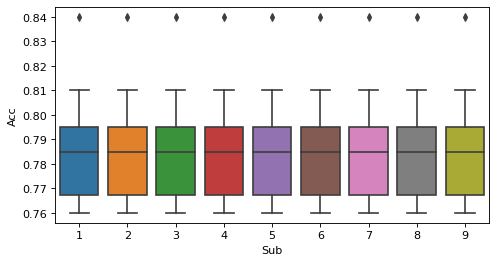

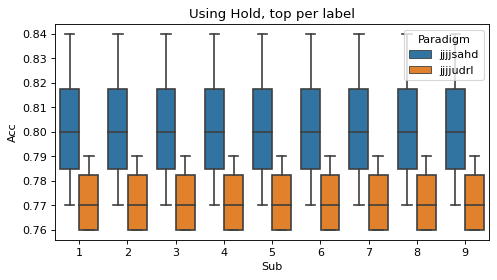

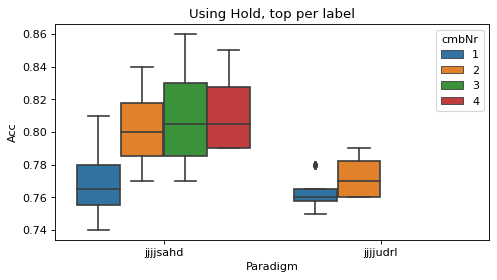

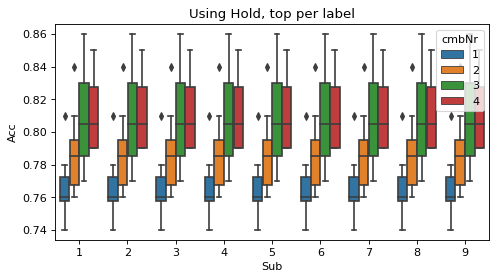

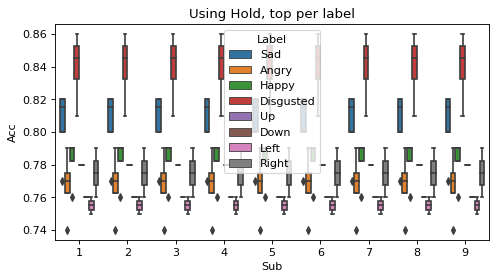

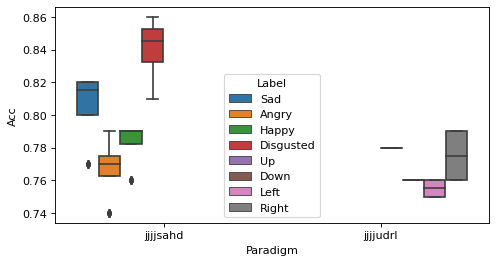

In [116]:
# Using Hold, top per label
genSavePath = f"{os.getcwd()}/topFeaturesResultsHold/"
#genSavePath = f"{os.getcwd()}/topBestFeaturesResults/"
import paradigmSetting as pa # [
paradigms = [pa.sadAngryHappyDisgustedJulia()[0] , pa.UpDownLeftRightJulia()[0]] # pa.rightLeftInner()[0]pa.sadAngryHappyDisgustedJulia()[0] pa.upDownInner()[0], pa.upDownVis()[0], pa.rightLeftVis()[0], , pa.upDownRightLeftVis()[0], pa.upDownRightLeftInner()[0]
comboNr = [1,2,3,4]
first = True
for para in paradigms:
    
    for nr in comboNr:
        topFeatures = []
        path = glob.glob(genSavePath + f"topPerLabel-para-{para}-cmb-{nr}*")
        if len(path) > 0:
            topFeatures = path
        if len(topFeatures)>0:
            #results.append(np.load(topFeatures[0], allow_pickle=True))
            if first:
                results = (pd.read_csv(topFeatures[0]).squeeze())
                results["cmbNr"] = nr
                first = False
                # print(f"{para}{nr}")

            else:
                # print(topFeatures)
                # print(f"{para}{nr}")
                newResults = pd.read_csv(topFeatures[0]).squeeze()
                newResults["cmbNr"] = nr
                results = pd.concat([results, newResults])
                

            # print(pd.read_csv(topFeatures[0]).shape)
        
# print(len(results))
results = pd.DataFrame(results)
# avgAccs = []
# for sub in (np.arange(9)+1):
#     print(sub)
# results["avgAcc"] = results["Acc"][results["Sub"] == 1]

#print(results)
comboNrFrames = []
highestCombo = 2
for nr in comboNr:
    comboNrFrames.append(results[results["cmbNr"] == nr])
pd.to_numeric(results["Acc"])
plt.figure(figsize=[7,3.5])
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub")
plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Using Hold, top per label")
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", hue="Paradigm")
plt.show()
# plt.figure()
# sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Label")
# plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Using Hold, top per label")
sns.boxplot(data = results, y="Acc", x = "Paradigm", hue = "cmbNr")
plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Using Hold, top per label")
sns.boxplot(data = results, y="Acc", x = "Sub", hue = "cmbNr")
plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Using Hold, top per label")
sns.boxplot(data = results, y="Acc", x = "Sub", hue = "Label")
plt.show()
plt.figure(figsize=[7,3.5])
sns.boxplot(data = results, y="Acc", x = "Paradigm", hue= "Label")
plt.show()
# plt.figure(figsize=[7,3.5])
# sns.relplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", col="Label")
# plt.show()
# results[results["Paradigm"] == "vvvvudrl"]
# results

jjjjsahd1
(9, 8)
jjjjsahd2
(9, 8)
jjjjsahd3
(9, 8)
jjjjsahd4
(9, 8)
jjjjudrl1
(9, 8)
jjjjudrl2
(9, 8)


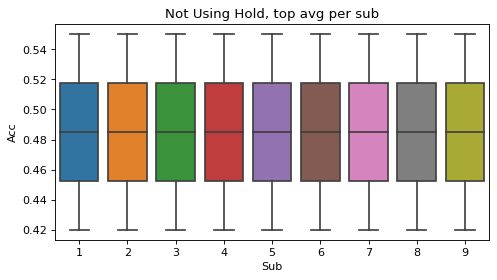

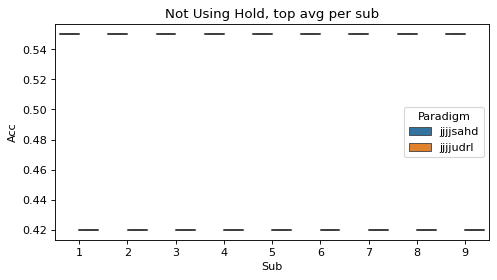

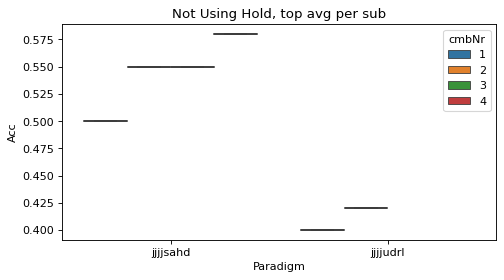

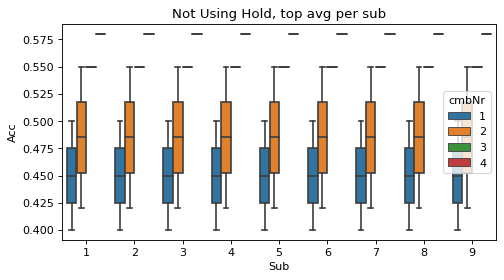

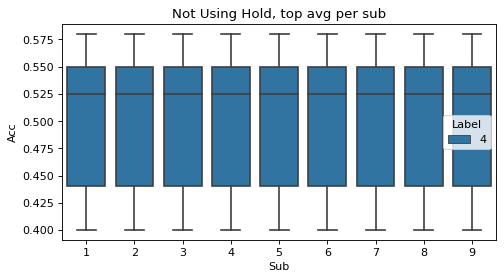

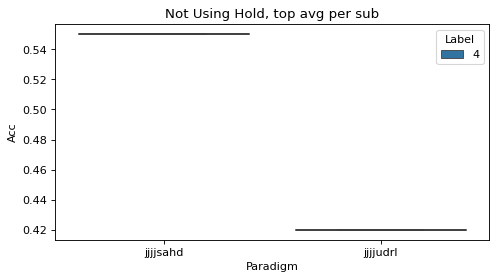

In [117]:
# Not Using Hold, top per subj avg
genSavePath = f"{os.getcwd()}/topFeaturesResults/"
#genSavePath = f"{os.getcwd()}/topBestFeaturesResults/"
import paradigmSetting as pa # [
paradigms = [pa.sadAngryHappyDisgustedJulia()[0] , pa.UpDownLeftRightJulia()[0]] # pa.rightLeftInner()[0]pa.sadAngryHappyDisgustedJulia()[0] pa.upDownInner()[0], pa.upDownVis()[0], pa.rightLeftVis()[0], , pa.upDownRightLeftVis()[0], pa.upDownRightLeftInner()[0]
comboNr = [1,2,3,4,5,6]
first = True
for para in paradigms:
    
    for nr in comboNr:
        topFeatures = []
        path = glob.glob(genSavePath + f"topPerSubjAvg-para-{para}-cmb-{nr}*")
        if len(path) > 0:
            topFeatures = path
        if len(topFeatures)>0:
            #results.append(np.load(topFeatures[0], allow_pickle=True))
            if first:
                results = (pd.read_csv(topFeatures[0]).squeeze())
                results["cmbNr"] = nr
                first = False
                print(f"{para}{nr}")

            else:
                # print(topFeatures)
                print(f"{para}{nr}")
                newResults = pd.read_csv(topFeatures[0]).squeeze()
                newResults["cmbNr"] = nr
                results = pd.concat([results, newResults])
                

            print(pd.read_csv(topFeatures[0]).shape)
        
# print(len(results))
results = pd.DataFrame(results)
# avgAccs = []
# for sub in (np.arange(9)+1):
#     print(sub)
# results["avgAcc"] = results["Acc"][results["Sub"] == 1]

#print(results)
comboNrFrames = []
highestCombo = 2
for nr in comboNr:
    comboNrFrames.append(results[results["cmbNr"] == nr])
pd.to_numeric(results["Acc"])

plt.figure(figsize=[7,3.5])
plt.title("Not Using Hold, top avg per sub")
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub")
plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Not Using Hold, top avg per sub")

sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", hue="Paradigm")
plt.show()
# plt.figure()
# sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Label")
# plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Not Using Hold, top avg per sub")

sns.boxplot(data = results, y="Acc", x = "Paradigm", hue = "cmbNr")
plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Not Using Hold, top avg per sub")

sns.boxplot(data = results, y="Acc", x = "Sub", hue = "cmbNr")
plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Not Using Hold, top avg per sub")

sns.boxplot(data = results, y="Acc", x = "Sub", hue = "Label")
plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Not Using Hold, top avg per sub")

sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Paradigm", hue= "Label")
plt.show()
# plt.figure(figsize=[7,3.5])
# sns.relplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", col="Label")
# plt.show()
# results[results["Paradigm"] == "vvvvudrl"]
# results

jjjjsahd1
(9, 8)
jjjjsahd2
(9, 8)
jjjjsahd3
(9, 8)
jjjjudrl1
(9, 8)
jjjjudrl2
(9, 8)


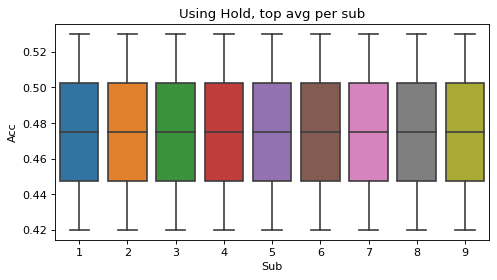

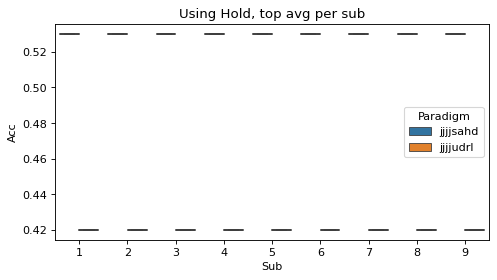

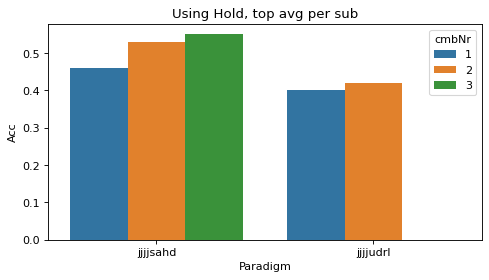

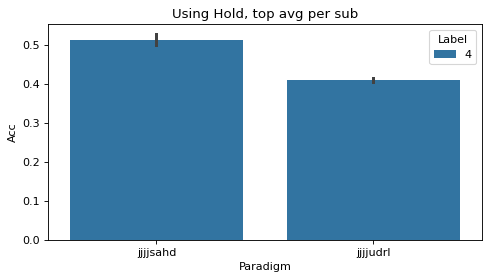

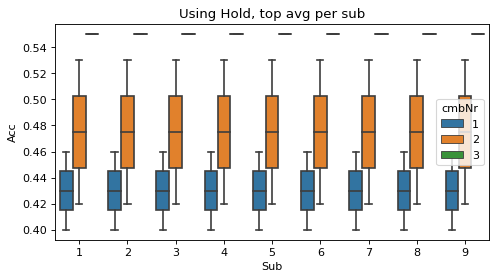

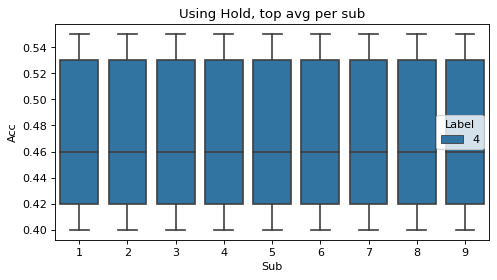

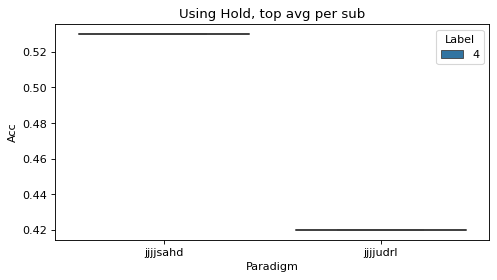

In [118]:
# Using Hold, top per subj avg
genSavePath = f"{os.getcwd()}/topFeaturesResultsHold/"
#genSavePath = f"{os.getcwd()}/topBestFeaturesResults/"
import paradigmSetting as pa # [
paradigms = [pa.sadAngryHappyDisgustedJulia()[0], pa.UpDownLeftRightJulia()[0] ] # pa.rightLeftInner()[0]pa.sadAngryHappyDisgustedJulia()[0] pa.upDownInner()[0], pa.upDownVis()[0], pa.rightLeftVis()[0], , pa.upDownRightLeftVis()[0], pa.upDownRightLeftInner()[0]
comboNr = [1,2,3]
first = True
for para in paradigms:
    
    for nr in comboNr:
        topFeatures = []
        path = glob.glob(genSavePath + f"topPerSubjAvg-para-{para}-cmb-{nr}*")
        if len(path) > 0:
            topFeatures = path
        if len(topFeatures)>0:
            #results.append(np.load(topFeatures[0], allow_pickle=True))
            if first:
                results = (pd.read_csv(topFeatures[0]).squeeze())
                results["cmbNr"] = nr
                first = False
                print(f"{para}{nr}")

            else:
                # print(topFeatures)
                print(f"{para}{nr}")
                newResults = pd.read_csv(topFeatures[0]).squeeze()
                newResults["cmbNr"] = nr
                results = pd.concat([results, newResults])
                

            print(pd.read_csv(topFeatures[0]).shape)
        
# print(len(results))
results = pd.DataFrame(results)
# avgAccs = []
# for sub in (np.arange(9)+1):
#     print(sub)
# results["avgAcc"] = results["Acc"][results["Sub"] == 1]

#print(results)
comboNrFrames = []
highestCombo = 2
for nr in comboNr:
    comboNrFrames.append(results[results["cmbNr"] == nr])
pd.to_numeric(results["Acc"])

plt.figure(figsize=[7,3.5])
plt.title("Using Hold, top avg per sub")

sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub")
plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Using Hold, top avg per sub")

sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", hue="Paradigm")
plt.show()
# plt.figure()
# sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Label")
# plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Using Hold, top avg per sub")

sns.barplot(data = results, y="Acc", x = "Paradigm", hue = "cmbNr")
plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Using Hold, top avg per sub")
sns.barplot(data = results, y="Acc", x = "Paradigm", hue = "Label")
plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Using Hold, top avg per sub")

sns.boxplot(data = results, y="Acc", x = "Sub", hue = "cmbNr")
plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Using Hold, top avg per sub")

sns.boxplot(data = results, y="Acc", x = "Sub", hue = "Label")
plt.show()
plt.figure(figsize=[7,3.5])
plt.title("Using Hold, top avg per sub")

sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Paradigm", hue= "Label")
plt.show()
# plt.figure(figsize=[7,3.5])
# sns.relplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", col="Label")
# plt.show()
# results[results["Paradigm"] == "vvvvudrl"]
# results

In [119]:

# print(results.shape)
# print(np.array(combos).shape)
# newRes = []
# for para, comb in zip(results, combos):
#     for sub in para:
#         newRes.append(np.concatenate([sub, [comb]]))
#         #print(np.concatenate([sub,["hi"]]))
# print(np.array(newRes).shape)
# print(np.array(newRes)[2])

#     # np.hstack()
#     # print(para[:])
#     # print(comb)
#     # np.hstack([para, comb], axis=1)

In [120]:
# df = pd.DataFrame(bestPerSub.T, index=subNames, columns=combos)
# df2 = pd.DataFrame(bestPerSub, index=combos, columns=subNames)
# df3 = pd.DataFrame(bestPerSub.T)

# df4 = pd.DataFrame(newRes, columns=["Accuracy", "Subjects", "Feature", "Kernel", "C", "Paradigm"] )
# # sns.relplot(data=df4, x="Paradigm", y="Subjects")
# # sns.relplot(data=df2)
# # sns.barplot(data=df4, x="Paradigm", y="Accuracy")
# sns.swarmplot(data=df2)
# # sns.relplot(df4)
# # sns.relplot(data=df3, row_order=subjects)

In [121]:
# plt.figure(figsize=[15,10])
# plt.boxplot(bestPerSub)
# combos = []
# for para in paradigms:
#     for type in types:
#         combos.append(f"{para}{type}")
# #plt.legend(combos)
# subjects = [1,2,3,4,5,6,7,8,9]
# plt.xticks(np.arange(len(subjects))+1, subjects,rotation=20)
# plt.title("Best Per paradigm for each subject")
# print("")

In [122]:
# onlyInner = bestPerSub[0::2, :]
# onlyVis = bestPerSub[1::2, :]

# plt.figure(figsize=[15,10])
# plt.boxplot(onlyInner)
# combos = []
# for para in paradigms:
#     for type in types:
#         combos.append(f"{para}{type}")
# print(combos[0::2])
# print(combos[1::2])
# print(combos)
# #plt.legend(combos)
# subjects = [1,2,3,4,5,6,7,8,9]
# plt.xticks(np.arange(len(subjects))+1, subjects,rotation=20)
# plt.title("Best Per Inner speech paradigm for each subject")
# print("")
# plt.figure(figsize=[15,10])
# plt.boxplot(onlyVis)
# combos = []
# for para in paradigms:
#     for type in types[0]:
#         combos.append(f"{para}{type}")
# #plt.legend(combos)
# subjects = [1,2,3,4,5,6,7,8,9]
# plt.xticks(np.arange(len(subjects))+1, subjects,rotation=20)
# plt.title("Best Per Visualized paradigm for each subject")
# print("")

In [123]:
# paradigms = ["ud", "rl", "udrl"]
# types = ["I","V"]
# combos = []
# for para in paradigms:
#     for type in types:
#         combos.append(f"{para}{type}")
# combos

In [124]:
# bestPerSub = np.zeros([results.shape[0], results.shape[1]])
# for paraNr, para in enumerate(results):
#     print(paraNr)
#     for subj in para:
#         print(paraNr)
#         # for x in subj[0]:
#         # bestPerSub[paraNr, int(subj[1])] = subj[0] 

# print(results.shape)
# plt.figure(figsize=[15,10])
# plt.boxplot(bestPerSub)
# # each row is a subject. Each column is a paradigm. Each value is best result for that subject/paradigm
# # udInner, udVis, rlInner, rlVis, udrlInner, udrlVis
# bestResultsPerParadigm = np.array([[0.98,   1,  0.96,   0.98,   0.75,   0.7],
#                                    [1,  1,  1,  1,  0.79,   0.76],
#                                    [0.97,   0.96,   0.98,   0.97,   0.78,   0.66], 
#                                    [1,  1,  1,  0.98,   0.79,   0.78], 
#                                    [1,  1,  1,  1,  0.8,    0.81], 
#                                    [0.94,   0.96,   0.96,  0.97,    0.73,   0.75], 
#                                    [1,  1,  0.98,   1,  0.76,   0.76], 
#                                    [1,  0.98,   1,  1,  0.75,   0.75],
#                                    [1,  1,  0.98,   1,  0.76,   0.74]])

# # First boxplot: first dim should be best results for all subjects for one "paradigm/word combo", second and onwards same but new paradigm
# # Second boxplot: Each dim should be a separate feature, containing best result for each subject. Do one plot each per paradigm
# # Third boxplot: Each dim should be best average result over all subjects for one paradigm/word combo. .... next dims, second best average mby not
# # This third one is not really boxplot. More like, Like "tower" plot
# # Do one boxplot per each paradigm. Start with these!
# # Then, better explain all the steps. 
# plt.figure(figsize=[15,10])
# plt.boxplot(bestResultsPerParadigm)
# plt.legend(["udInner", "udVis", "rlInner"," rlVis", "udrlInner", "udrlVis"])
# plt.figure(figsize=[22,10])
# plt.boxplot(bestResultsPerParadigm.T)
# plt.legend([f"sub ject {1}", f"sub ject {2}", f"sub ject {3}",f"sub ject {4}", f"sub ject {5}", f"sub ject {6}"f"sub ject {7}", f"sub ject {8}", f"sub ject {9}"])


# print("")

In [125]:
# # each row is a subject, each column is a feature. Each value in each one is best result for one subject for that feature

# upDownLeftRightInnerBestResultsPerFeature = np.array([
#                                    [2,3],
#                                    [4,5],
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5],
#                                    [4,5]])

# plt.figure()
# plt.boxplot(upDownLeftRightInnerBestResultsPerFeature)
# print("")


# # Top ten highest accuracies, up down inner,  one feature. Here though. I need to go through
# # each feature in makeTables

# # Accuracy 0.94 : subject 8, feature:-dataFFTCV-BC, kernelsigmoid, C:10

# # Accuracy 0.94 : subject 5, feature:-dataWCV-BC, kernelrbf, C:10

# # Accuracy 0.91 : subject 1, feature:-dataFFTCV-BC, kernelrbf, C:0.5

# # Accuracy 0.9 : subject 4, feature:-dataFFTCV-BC, kernellinear, C:2.5

# # Accuracy 0.87 : subject 7, feature:-dataFFTCV-BC, kernelrbf, C:1.2

# # Accuracy 0.87 : subject 2, feature:-dataWCV-BC, kernelsigmoid, C:2.5

# # Accuracy 0.84 : subject 9, feature:-dataWCV-BC, kernelrbf, C:10

# # Accuracy 0.84 : subject 6, feature:-dataWCV-BC, kernelrbf, C:0.5

# # Accuracy 0.77 : subject 3, feature:-dataFFTCV-BC, kernelrbf, C:10

In [126]:

# # Accuracy 0.84 : subject 9, feature:-dataWCV-BC, kernelrbf, C:10

# # Accuracy 0.84 : subject 6, feature:-dataWCV-BC, kernelrbf, C:0.5

# # Accuracy 0.99 : subject 8, feature:dataHRCV-BCcn3-dataWCV-BC--dataFFTCV-BC, kernelrbf, C:0.5

# # Accuracy 0.99 : subject 5, feature:dataHRCV-BCcn3--dataWCV-BC, kernelrbf, C:10

# # Accuracy 0.98 : subject 7, feature:welchDatacn3BC-dataWCV-BC--dataFFTCV-BC, kernellinear, C:2.5

# # Accuracy 0.97 : subject 4, feature:welchDatacn3BC-dataHRCV-BC--dataWCV-BC, kernellinear, C:2.5

# # Accuracy 0.92 : subject 1, feature:dataHRCV-BC-dataWCV-BC--dataFFTCV-BC, kernelrbf, C:2.5

# # Accuracy 0.91 : subject 2, feature:welchDatacn3BC-dataWCV-BC--dataFFTCV-BC, kernelrbf, C:5

# # Accuracy 0.79 : subject 3, feature:dataWCV-BC--dataFFTCV-BC, kernelrbf, C:10

# # each row is a subject, each column is a feature. Each value in each one is best result for one subject for that feature
# upDownInnerBestResultsPerFeature = np.array([
#                                    [2,3],
#                                    [4,5],
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5],
#                                    [4,5]])

# plt.figure()
# plt.boxplot(upDownInnerBestResultsPerFeature)
# print("")

In [127]:
# genSavePath = f"{os.getcwd()}/topFeaturesResults/"
# import paradigmSetting as pa
# paradigms = [ pa.upDownInner()[0], pa.upDownVis()[0], pa.rightLeftVis()[0], pa.rightLeftInner()[0], pa.upDownRightLeftVis()[0], pa.upDownRightLeftInner()[0]]
# types = ["I","V"]
# comboNr = [1,2,3,4]
# results = []
# for para in paradigms:
#     topFeatures = []
#     for nr in comboNr:
#         path = glob.glob(genSavePath + f"topPerSubj-para-{para}-cmb-{nr}*")
#         if len(path) > 0:
#             topFeatures = path
#     if len(topFeatures)>0:
#         #results.append(np.load(topFeatures[0], allow_pickle=True))
#         results = (pd.read_csv(topFeatures[0]).squeeze())
#         print(pd.read_csv(topFeatures[0]).shape)
        
# # print(len(results))
# results = pd.DataFrame(results)
# # avgAccs = []
# # for sub in (np.arange(9)+1):
# #     print(sub)
# # results["avgAcc"] = results["Acc"][results["Sub"] == 1]

# #print(results)
# pd.to_numeric(results["Acc"])
# # plt.figure()
# # sns.relplot(data = results, y="Acc", x = "Sub", col="Label")
# # plt.show()
# plt.figure()
# sns.boxplot(data = results, y="Acc", x = "Sub")
# plt.show()
# plt.figure()
# sns.boxplot(data = results, y="Acc", x = "Label")
# plt.show()
# plt.figure()
# sns.boxplot(data = results, y="Acc", x = "Paradigm")
# plt.show()
# #print(results.name.unique())
# results[results["Paradigm"] == "vvvvudrl"]
# results


